In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split # функция, чтобы разбить данные на трейн и тест
from sklearn.linear_model import LogisticRegression # наша модель для классификации
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

In [3]:
data = pd.read_csv('./data/glass.xls')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [14]:
data.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

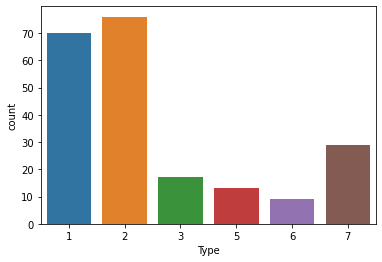

In [4]:
sns.countplot(x='Type', data=data)

In [5]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

<AxesSubplot:>

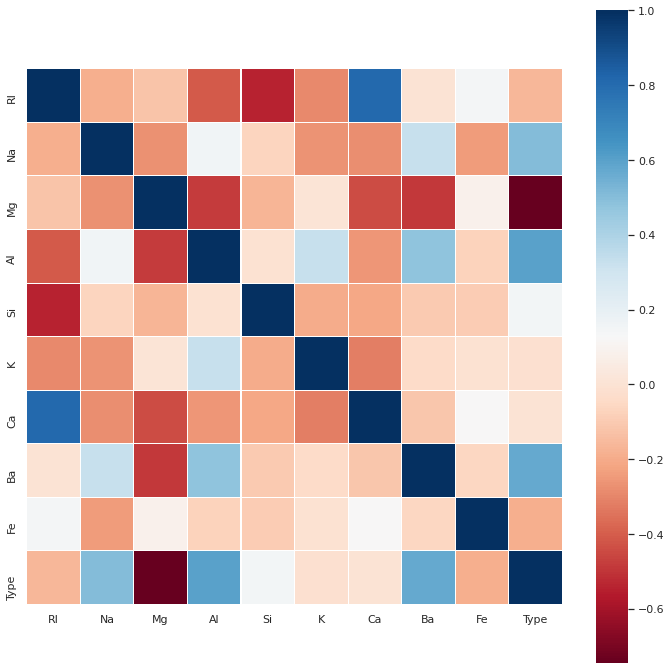

In [6]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(), square=True,
              annot=False, fmt=".1f", linewidths=0.1, cmap="RdBu")

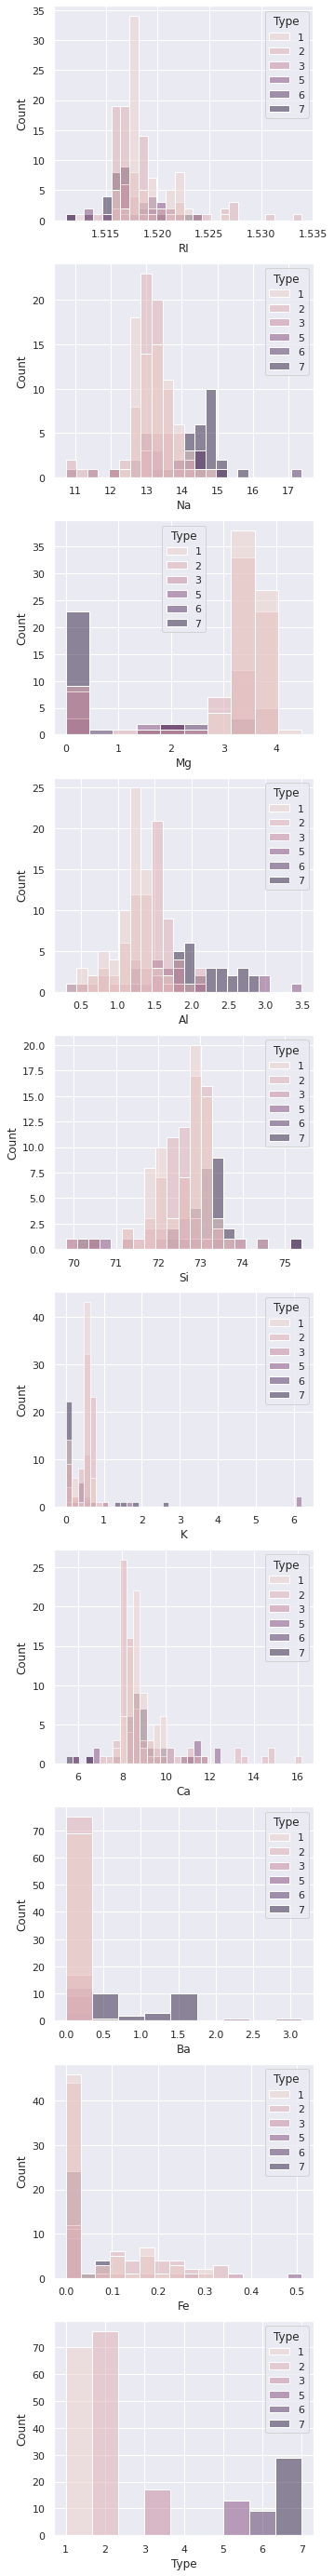

In [8]:
fig, axes = plt.subplots(nrows=len(data.columns), ncols=1, figsize=(5,5*len(data.columns)))
for i,column in enumerate(data.columns):
    sns.histplot(data,x=column, hue='Type', ax=axes[i], legend=True,)

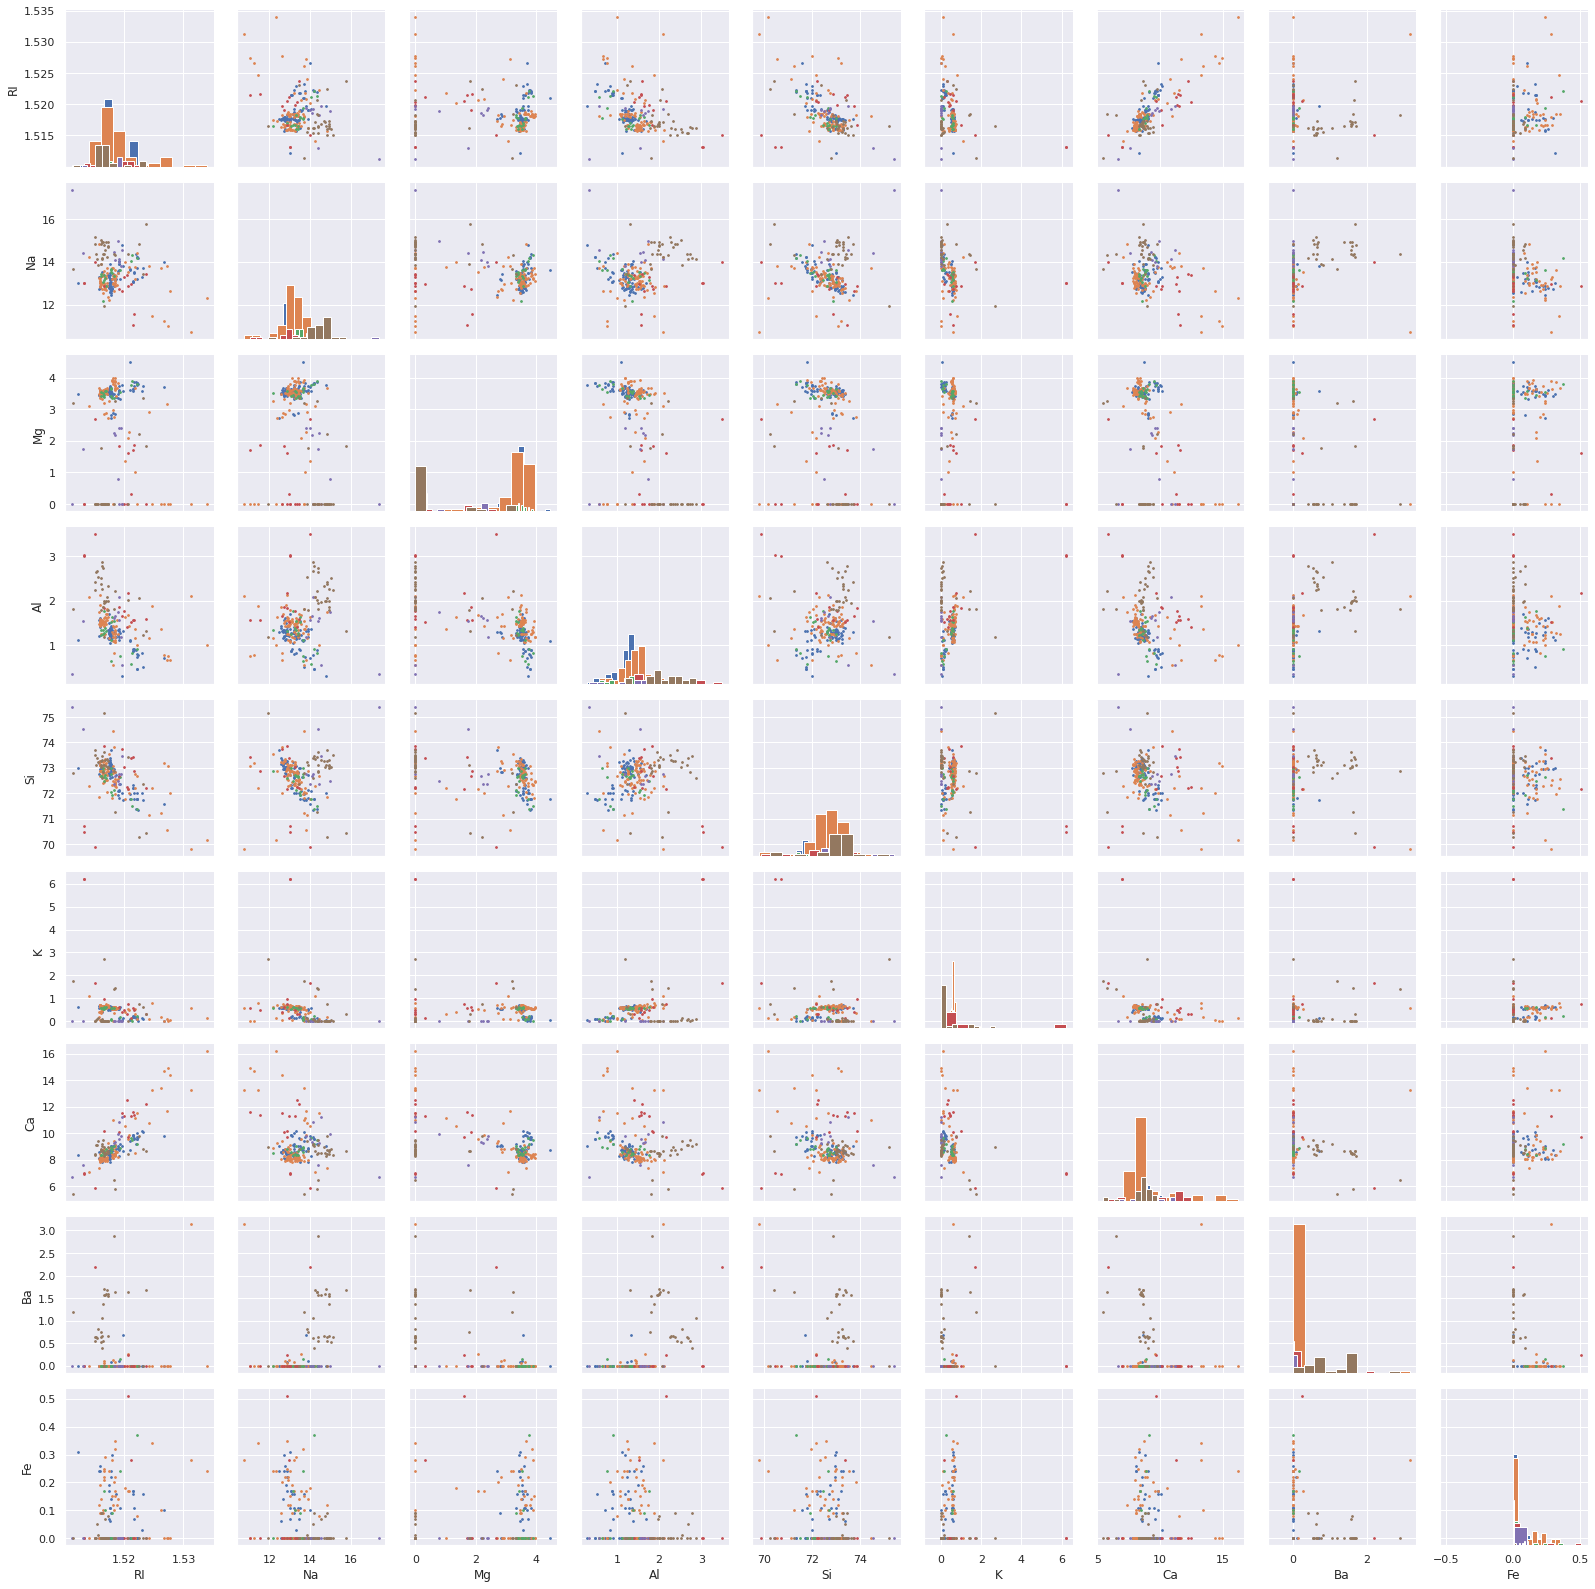

In [9]:
g = sns.PairGrid(data, hue='Type' )
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s = 3)

In [10]:
X = data.drop(columns='Type')
y = data['Type']

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
model=KNeighborsClassifier(n_neighbors=3)
kf = KFold(n_splits=5)
  
#print("accuracy: {:.3f}".format(cross_val_score(model, X, y, cv=kf, scoring="accuracy").mean()))

In [23]:
cross_val_score(model, X, y, cv=kf, scoring="accuracy").mean()

0.3677740863787376

In [25]:
model.fit(X, y)
model.predict([[1.5, 12.3, 4.2, 1.3, 72.7, 0.57, 7.4, 0, 0]])

array([2])